In [ ]:
pip install torch

  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.19.3-py3-none-manylinux1_x86_64.whl (166.0 MB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (99 kB)
  Using cached nvidia_nvjitlink_cu12-12.4.127-py3-none-m

In [ ]:
pip install pennylane

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 9.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 15.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.8/50.8 kB 6.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.1/19.1 MB 42.8 MB/s eta 0:00:00


In [ ]:
pip install pylatexenc

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.6/162.6 kB 3.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pylatexenc: filename=pylatexenc-2.10-py3-none-any.whl size=136816 sha256=71f4a6ea7b4968ff647158905680aee744f4c16f0ac389e1f608f5b390b84e5d
  Stored in directory: /root/.cache/pip/wheels/d3/31/8b/e09b0386afd80cfc556c00408c9aeea5c35c4d484a9c762fd5
Successfully built pylatexenc


In [ ]:
import torch
import pennylane as qml
import numpy as np
import math
import matplotlib.pyplot as plt

n_qubits = 8

# Especificación del circuito

In [ ]:
dev = qml.device("default.qubit", wires=n_qubits)

def operador(weights):
  count = 0
  for i in reversed(range(n_qubits//2)):
    for j in reversed(range(i+1)):
        qml.CRZ(weights[count], [n_qubits-j-1, i])
        count += 1

@qml.qnode(dev)
def circuit(inputs, weights):
  inputs *= math.pi
  qml.AngleEmbedding(inputs, wires=range(n_qubits))
  qml.QFT(wires=range(n_qubits//2))
  operador(weights)
  qml.adjoint(qml.QFT(wires=range(n_qubits//2)))
  return [qml.expval(qml.PauliZ(wires=i)) for i in range(n_qubits)]

inputs = np.array([0.,0.,0.,0.,0.,0.,0.,0.])
weights = np.array([math.pi, math.pi/2, math.pi/4, math.pi/8, math.pi, math.pi/2, math.pi/4, math.pi, math.pi/2, math.pi])
print(qml.draw(circuit)(inputs, weights))

0: ─╭AngleEmbedding(M0)─╭QFT──────────────────────────────────────────────────────────────────────
1: ─├AngleEmbedding(M0)─├QFT──────────────────────────────────────────────────────────────────────
2: ─├AngleEmbedding(M0)─├QFT─────────────────────────────────────────╭RZ(3.14)─╭RZ(1.57)─╭RZ(0.79)
3: ─├AngleEmbedding(M0)─╰QFT─╭RZ(3.14)─╭RZ(1.57)─╭RZ(0.79)─╭RZ(0.39)─│─────────│─────────│────────
4: ─├AngleEmbedding(M0)──────╰●────────│─────────│─────────│─────────│─────────│─────────│────────
5: ─├AngleEmbedding(M0)────────────────╰●────────│─────────│─────────╰●────────│─────────│────────
6: ─├AngleEmbedding(M0)──────────────────────────╰●────────│───────────────────╰●────────│────────
7: ─╰AngleEmbedding(M0)────────────────────────────────────╰●────────────────────────────╰●───────

──────────────────────╭RZ(3.14)─╭QFT†─┤  <Z>
──╭RZ(3.14)─╭RZ(1.57)─│─────────├QFT†─┤  <Z>
──│─────────│─────────│─────────├QFT†─┤  <Z>
──│─────────│─────────│─────────╰QFT†─┤  <Z>
──│─────────│─────────│────

## Funciones auxiliares

- binarios(a,b): devuelve la concatenación de las representaciones binarias de a y b.
- formatoSalida(y): dada una lista/tensor 'y' de valores entre -1 y 1, devuelve una lista de sus valores con signo opuesto y acotados al intervalo \[0,1\]
- decimales(y): dada una lista 'y' con la codificación binaria de un número arbitrario de valores de n_qubits//2 bits, devuelve la lista de dichos valores en decimal.

In [ ]:
def binarios(a, b):
  return [int(i) for i in list(('{:0'+str(n_qubits//2)+'b}').format(a))] + [int(i) for i in list(('{:0'+str(n_qubits//2)+'b}').format(b))]

def formatoSalida(y):
  if type(y) == torch.Tensor:
    return -1*(y-1) / 2
  return [int(abs(round((-1*(x if type(x) != torch.Tensor else x.item())+1)/2, 2))) for x in y]

def decimales(y):
  if type(y) == torch.Tensor:
    y = y.detach().numpy().tolist()
  y = np.split(np.array(y), [n_qubits//2])
  return [int("".join(str(int(abs(round(x)))) for x in bits), 2) for bits in y]

In [ ]:
formatoSalida(circuit(torch.Tensor([0,0,1,0,0,0,1,1]), weights))

[0, 1, 0, 1, 0, 0, 1, 1]

# Conjunto de datos

In [ ]:
train_set_sum = []
for x1 in range(2**(n_qubits//2)):
    for x2 in range(2**(n_qubits//2)):
      if x1 + x2 < 2**(n_qubits//2):
        train_set_sum.append((binarios(x1,x2),binarios(x1+x2,x2)))
print(len(train_set_sum))

136
136


# Entrenamiento y resultados

In [ ]:
def train(model, train_set, epochs=15, lr=0.5):
  opt = torch.optim.SGD(model.parameters(), lr=lr)
  loss = torch.nn.L1Loss()
  avg_loss_list = []
  for epoch in range(epochs):
    running_loss = 0
    for (x,y) in train_set:
        opt.zero_grad()
        x = torch.Tensor(x)
        y = torch.Tensor(y)
        y_pred = formatoSalida(model(x))
        loss_evaluated = loss(y_pred, y)
        loss_evaluated.backward()
        opt.step()
        running_loss += loss_evaluated

    avg_loss = running_loss / len(train_set)
    print("Average loss over epoch {}: {:.4f}".format(epoch + 1, avg_loss))
    avg_loss_list.append(avg_loss.item())
  plt.figure()
  plt.title('Pérdida media por época')
  plt.plot(range(epochs), avg_loss_list)


def accuracy(model, train_set):
  x = [a for a,b in train_set]
  y = [b for a,b in train_set]
  y_pred = model(torch.Tensor(x)).detach().numpy().tolist()

  correct = [(-p+1)/2 if p_true else 1-(-p+1)/2 for pred_bits, y_bits in zip(y_pred, y) for p, p_true in zip(pred_bits, y_bits)]
  accuracy = sum(correct) / len(correct)
  for p in model.parameters():
    print('Parameters/pi:', p / math.pi)
  print(f"Accuracy: {accuracy * 100}%")

Average loss over epoch 1: 0.1828
Average loss over epoch 2: 0.1550
Average loss over epoch 3: 0.1280
Average loss over epoch 4: 0.0327
Average loss over epoch 5: 0.0009
Average loss over epoch 6: 0.0001
Average loss over epoch 7: 0.0000
Average loss over epoch 8: 0.0000
Average loss over epoch 9: 0.0000
Average loss over epoch 10: 0.0000
Parameters/pi: tensor([1.0004, 2.4999, 0.2499, 0.1250, 1.0000, 0.5000, 0.2500, 1.0000, 0.5000,
        1.0000], grad_fn=<DivBackward0>)
Accuracy: 99.99999912893948%


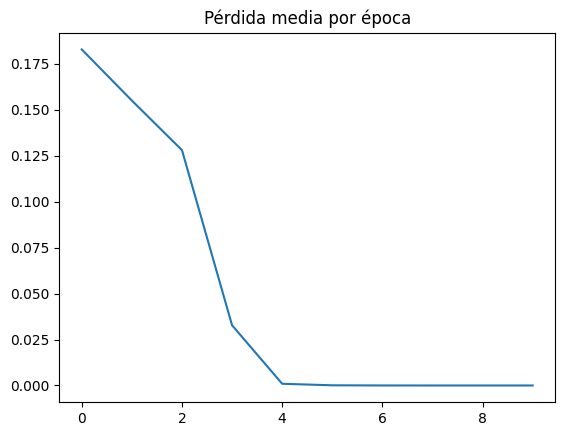

In [ ]:
sumador = qml.qnn.TorchLayer(circuit, {"weights":(10)})
train(sumador, train_set_sum, epochs=10)
accuracy(sumador, train_set_sum)

In [ ]:
print([0,0,1,0,0,0,1,1], '->', formatoSalida(sumador(torch.Tensor([0,0,1,0,0,0,1,1])).detach().numpy().tolist()))
print([2,3], '->', decimales(formatoSalida(sumador(torch.Tensor(binarios(2,3))).detach().numpy().tolist())))
print([14,5], '->', decimales(formatoSalida(sumador(torch.Tensor(binarios(14,5))).detach().numpy().tolist())))

[0, 0, 1, 0, 0, 0, 1, 1] -> [0, 1, 0, 1, 0, 0, 1, 1]
[2, 3] -> [5, 3]
[14, 5] -> [3, 5]


# Extra: Restador

In [ ]:
train_set_res = []
for x1 in range(2**(n_qubits//2)):
    for x2 in range(2**(n_qubits//2)):
      if x1 - x2 >= 0:
        train_set_res.append((binarios(x1,x2),binarios(x1-x2,x2)))
print(len(train_set_res))

Average loss over epoch 1: 0.0912
Average loss over epoch 2: 0.0276
Average loss over epoch 3: 0.0074
Average loss over epoch 4: 0.0014
Average loss over epoch 5: 0.0002
Average loss over epoch 6: 0.0000
Average loss over epoch 7: 0.0000
Average loss over epoch 8: 0.0000
Average loss over epoch 9: 0.0000
Average loss over epoch 10: 0.0000
Parameters/pi: tensor([ 1.0003, -0.4999,  1.7499,  1.8748,  1.0000,  1.5000, -0.2500,  1.0000,
        -0.5000,  1.0000], grad_fn=<DivBackward0>)
Accuracy: 99.99999938368359%


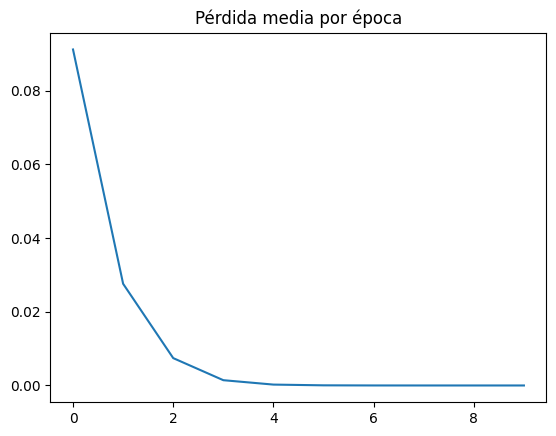

In [ ]:
restador = qml.qnn.TorchLayer(circuit, {"weights":(10)})
train(restador, train_set_res, epochs=10)
accuracy(restador, train_set_res)

In [ ]:
print([1,0,1,0,0,1,1,1], '->', formatoSalida(restador(torch.Tensor([1,0,1,0,0,1,1,1])).detach().numpy().tolist()))
print([10,7], '->', decimales(formatoSalida(restador(torch.Tensor(binarios(10,7))).detach().numpy().tolist())))
print([14,5], '->', decimales(formatoSalida(restador(torch.Tensor(binarios(14,5))).detach().numpy().tolist())))

[1, 0, 1, 0, 0, 1, 1, 1] -> [0, 0, 1, 1, 0, 1, 1, 1]
[10, 7] -> [3, 7]
[14, 5] -> [9, 5]
